In [38]:
import os
import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import json
from __future__ import division, print_function
from getCitiBikeCSV import getCitiBikeCSV

import scipy.stats


import pylab as pl
import seaborn
%pylab inline

np.seed = 999

Populating the interactive namespace from numpy and matplotlib


# “What Is Science”

### epistemology - the study of “what is science”

### reproduceability
Why is reproducibility important? A: enables independent verification of science inference

### falsifiability
What’s the defining characteristic of scientific theory? A: FALSIFIABILITY example: why is astrology not a theory? not falsifiable - you cannot conceive of an observation or an argument which negates the concept of astrology and that stars influence events
https://en.wikipedia.org/wiki/Falsifiability


![1](Screen Shot 2016-10-20 at 11.15.03 AM.png)

Name at least one type of data-science analysis? A: Descriptive, Exploratory, Inferential, Predictive, Causal, Mechanistic

### precision vs accuracy

# Types of Errors
### Statistical 
### Systematic

# Data Munging

### Using an API 

In [ ]:
print(os.getenv("MTAKEY"))

def getMtaData(busline, mtakey = str(os.getenv("MTAKEY")), output = 'bus.json'):
	api = 'http://bustime.mta.info/api/siri/vehicle-monitoring.json?key=' + mtakey + \
    '&VehicleMonitoringDetailLevel=calls&LineRef='+ busline
    
    
def get_jsonparsed_data(url):
    	"""
    	from http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
    	Receive the content of ``url``, parse it as JSON and return the object.

		Parameters
        ----------
    	url : str

		Returns
    	-------
    	dict
    	"""

	response = urllib.urlopen(url)
	data = response.read().decode("utf-8")
	return json.loads(data)

jsonData = get_jsonparsed_data(api)

with open(output, 'w') as outfile:
	json.dump(jsonData, outfile)     

### example of reading in json file

### example of reading in csv

In [12]:
data_NYC_housing = pd.read_csv("DOF__Condominium_Comparable_Rental_Income__Manhattan___FY_2008_2009.csv")

In [14]:
data_small = data_NYC_housing[["MANHATTAN CONDOMINIUM PROPERTY Total Units", \
                           "MANHATTAN CONDOMINIUM PROPERTY Gross SqFt", \
                          "MANHATTAN CONDOMINIUM PROPERTY Est. Gross Income", \
                          "MANHATTAN CONDOMINIUM PROPERTY Gross Income per SqFt"]]
data_small.columns = ['total_units', 'gross_area', 'gross_income', 'gross_income_per_area'] 
data_small.head()

,total_units,gross_area,gross_income,gross_income_per_area
0,42,36500,994000,27.2
1,500,554174,17000000,30.7
2,282,249076,9500000,38.1
3,239,219495,7600000,34.6
4,133,139719,4830000,34.6


## example of selecting rows in panda dataframe

In [18]:
data1 = data_small.loc[(data_small.total_units > 500)]
data1.head()

,total_units,gross_area,gross_income,gross_income_per_area
10,546,586224,23000000,39.2
321,713,616965,19126000,31.0
421,645,575077,23003000,40.0
455,1121,1171064,29276600,25.0
457,818,842317,32850000,39.0


### example of adding / dropping columns in panda dataframe

In [19]:
data2 = data1.iloc[:,1:3]
data2.head()

,gross_area,gross_income
10,586224,23000000
321,616965,19126000
421,575077,23003000
455,1171064,29276600
457,842317,32850000


In [20]:
data3 = data1[['gross_area', 'gross_income_per_area']]
data3.head()

,gross_area,gross_income_per_area
10,586224,39.2
321,616965,31.0
421,575077,40.0
455,1171064,25.0
457,842317,39.0


In [21]:
data3.columns = ['column_2', 'column_3']
data3.head()

,column_2,column_3
10,586224,39.2
321,616965,31.0
421,575077,40.0
455,1171064,25.0
457,842317,39.0


# Distributions


### Normal -- Gaussian

### Poisson

### Chi Squared

# Statistical Tests

## Stating the Null Hypothesis:

#### Verbally:

Null Hypothesis: The mean of A is not different or is significantly greater than the mean of B.  
Alternate Hypothesis: The mean of A is significantly less than the mean of B.

#### Mathematically:

$H_0$: A.mean() >= B.mean()

$H_a$: A.mean() < B.mean()

### $\alpha=0.05$


## T - Test

In [43]:
#t-test to test null hypothesis
T = (df_old.tripduration.mean() - df_young.tripduration.mean()) \
/ np.sqrt((((df_old.tripduration.std()**2) / len(df_old)) + \
((df_young.tripduration.std()**2)/len(df_young))))
print(T)

NameError: name 'df_old' is not defined

## Z - Test

Suppose that in a particular geographic region, the mean and standard deviation of scores on a reading test are 100 points, and 12 points, respectively. Our interest is in the scores of 55 students in a particular school who received a mean score of 96. We can ask whether this mean score is significantly lower than the regional mean—that is, are the students in this school comparable to a simple random sample of 55 students from the region as a whole, or are their scores surprisingly low?

We begin by calculating the standard error of the mean:

${SE} = \frac{{\sigma}}{\sqrt{n}} $

Next we calculate the z-score, which is the distance from the sample mean to the population mean in units of the standard error:

$z = \frac{(M - \mu)}{SE} $

## Z - Test - difference in proportions

https://localhost:8000/user/gtp232/notebooks/homedirs/gtp232/PUI2016_fb55/HW3_fb55/citibikes_gender.ipynb

#### Is the percentage of women that ride on weekends lower or equal to that of man?
#### The statistics is: 
### $z = \frac{(p_0 - p_1)}{SE} $
### $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
### $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
#### and in this notation 
### $p_0 = \frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}}$
##### and 
### $p_1 = \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$

## Chi Squared Test

# Goodness of Fit Tests 

## KS Test

In [39]:
#get data for may and june 2016
datestring = '201505'
datestring2 = '201506'
getCitiBikeCSV(datestring)
getCitiBikeCSV(datestring2)
df_may = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_june = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df_1 = df_may.append(df_june, ignore_index=True)
df_1['age'] = 2015 - df_1['birth year'][(df_1['usertype'] == 'Subscriber')]
df_1 = df_1[['birth year', 'age', 'starttime', 'stoptime', 'usertype']]
# dropping NaN values
df_1['age'].dropna(inplace= True)
#create a normal distribution with citibike params
mean_age = df_1.age.mean()
std_age = df_1.age.std()
hg = sorted(df_1.age)
age_normal_dist = stats.norm.pdf(hg, np.mean(hg), np.std(hg))
#create a poisson distribution with citibike params
age_poisson_dist = np.random.poisson(mean_age, len(df_1))

('Downloading', '201505')
file in place, you can continue
('Downloading', '201506')
file in place, you can continue


In [40]:
#compare normal with actual citibike data with KS test

ks = stats.ks_2samp(df_1.age, age_normal_dist)
print (ks)

Ks_2sampResult(statistic=0.9999999999685809, pvalue=0.0)


From the code above, you can see that the k statistic is large and the pvalue is essentially zero, meaning the null is rejected, and the citibike age distribution is NOT normally distributed at a significance level of 5%.

## AD Test

In [41]:
#compare normal with actual citibike data with AD test
ad = stats.anderson(df_1.age, dist='norm')
print (ad)

AndersonResult(statistic=22174.319962217938, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


From the code above, you can see that the AD statistic is much larger than the critical values at even the 1% level, meaning the null is rejected, and the citibike age distribution is NOT normally distributed at a significance level of 5%.

# Log Likelihood

# Regression

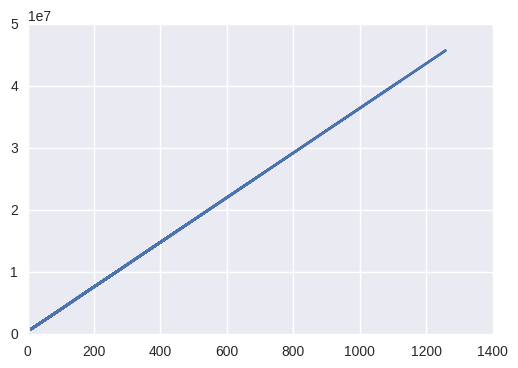

In [25]:
linmodel_total_units = smf.ols(formula = 'gross_income ~ total_units',
                            data = data_small).fit()

linmodel_total_units.summary()
pars = linmodel_total_units.params
pl.plot(data_small.total_units, pars[0] + pars[1]*data_small.total_units)

# Plotting Stuff

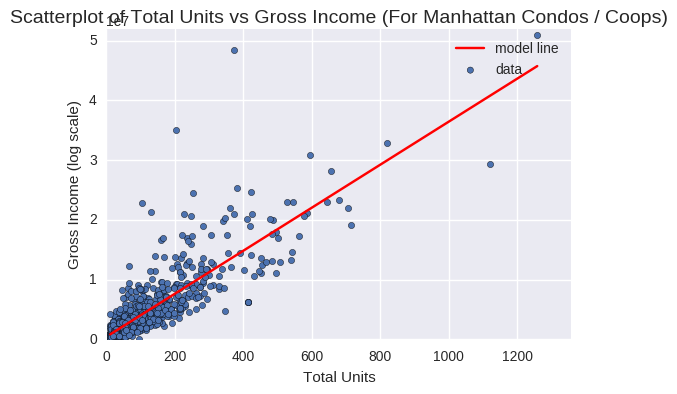

In [34]:

#plotting scatterpoint
ax = data_small.plot(x = 'total_units', y = 'gross_income', kind = 'scatter', label='data')

#plotting labels
ax.set_xlabel("Total Units")
ax.set_ylabel("Gross Income (log scale)")
pl.title('Scatterplot of Total Units vs Gross Income (For Manhattan Condos / Coops)', fontsize=14)


#plotting regression line
total_units_plot_range = np.linspace(data_small.total_units.min(), data_small.total_units.max(), 100)
tmp = pd.DataFrame()
tmp['total_units'] = total_units_plot_range

### need to pass .predict() a dataframe!
gross_income_predicted = linmodel_total_units.predict(tmp)
ax.plot(total_units_plot_range, gross_income_predicted, c='r', label='model line')

#setting axis limits
pl.xlim(0, (data_small.total_units.max()+100))
pl.ylim(0, (data_small.gross_income.max()+1000000))

#plotting legend
ax.legend()